In [9]:
#!pip install pandas openpyxl
import os
import re
import pandas as pd
import numpy as np

In [10]:
# Load the Excel file
file_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/annotation_data/new_annotations_final.xlsx'

# Read the sheets into separate DataFrames
df1 = pd.read_excel(file_path, sheet_name='annotation_notes').fillna('None')
print('The  Number of Unique Titles:', len(df1['title'].unique()))

df1.head()

The  Number of Unique Titles: 100


,title,paper name,vol,notes,Info outside article,name of dataset
0,3D Arterial Segmentation via Single 2D Project...,14,1,We use an in-house dataset of contrast-enhance...,"For cross-validation, the imaging data were pa...",None
1,A Multi-task Network for Anatomy Identificatio...,45,9,A dataset of 64-videos (635 images) were recor...,Participant demographics collected included tr...,None
2,A Texture Neural Network to Predict the Abnorm...,46,8,"Following IRB approval for this study, we sear...",None,None
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,74,3,We compared the performance of our proposed mo...,None,"Pca-AS, Pca-BT, PANDA Challenge dataset"
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,17,1,*mention patient in conclusion\n\nWe evaluate ...,The BraTS dataset describes a collection of br...,"BraTS dataset, Brain Tumor Segmentation chall..."


In [11]:
df1['name of dataset'] = df1['name of dataset'].str.lower()
unique_datasets = df1['name of dataset'].unique() 

In [21]:
import numpy as np
# Mapping dictionary: map variant names to a standardized name
name_mapping = {
    "Name of Dataset not Provided": "None",
    "PANDAS Dataset":  ['panda challenge dataset'],
    "PCa-AS Dataset": ['pca-as'], 
    "PCa-BT Dataset": ['pca-bt'], 
    "Lyon19 Challenge Dataset": ["lyon19 challenge dataset"],
    "NUCLICK Training Dataset": ["nuclick training dataset"],
    "CAMUS Dataset": ["camus dataset"],
    "JSRT Dataset": ["jsrt dataset", "the japanese society of radiological technology dataset"],
    "GVBLEED Dataset": ["gvbleed dataset"],
    "TNBN Dataset": ["tnbn dataset"],
    "KIRC Dataset": ["kirc dataset"],
    "CRC Dataset": ["crc dataset"],
    "LLD Dataset": ["lld study"],
    "DM Dataset": ["dm study"],
    "ADNI Dataset": ["alzheimer’s disease neuroimaging initiative (adni) dataset", "adni dataset", "adni"],
    "HMSS Dataset": ["hmss dataset"],
    "BUSI Dataset": ["busi dataset"],
    "BUSIS Dataset": ["busis dataset"],
    "Dataset B": ["dataset b"],
    "NSCLC-TCIA Dataset": ["nsclc-tcia dataset", "nsclc radiomics and nsclc radiogenomics"],
    "Montgomery Dataset": ["montgomery dataset"],
    "Shenzen Dataset": ["shenzen dataset"],
    "ISIC 2018 Dataset": ["isic 2018 dataset"],
    "CVC-ClinicDB Dataset": ["cvc-clinicdb dataset"],
    "OASIS-1 Dataset": ["oasis-1 dataset"],
    "BraTS Dataset 2021": ["2021 brats",  "brats 2021 dataset"],
    "BraTS Dataset 2020": ["2020 brats", "brats 2020 dataset"],
    "BraTS Dataset": ["brats dataset", "brats", "brain tumor segmentation challenge dataset"],
    "BraTS Dataset 2017": ["2017 brats", "brats 2017 dataset", "brain tumor segmentation challenge 2017 (brats) dataset"],
    "BraTS-Reg 2022 Dataset": ["brats-reg 2022 dataset"],
    "LIDC-IDRI Dataset": ["lidc-idri dataset"],
    "TCGA Dataset": ["tcga dataset", "the caner genome atlas (tcga)", "the cancer genome atlas (tcga)"],
    "Human Connectome Project": ["human connectome project", "hcp", "human connectome project (hcp) dataset"],
    "NIH ChestXray-8 Dataset": ["nih chestxray-8 (cxr8) dataset", "chestx-ray8 dataset", "chestxray8 dataset"],
    "NIH ChestXray-14 Dataset": ["nih chestxray-14 (cxr14) dataset", "chestx-ray14 dataset", "chestxray14 dataset"],
    "ChestXR Dataset": ["chestxr dataset"],
    "NLST Dataset": ["nlst dataset"],
    "LiTS Dataset": ["lits dataset"],
    "KiTS Dataset": ["kits dataset"],
    "QUBIQ 2020 Dataset": ["qubiq 2020 dataset"],
    "Breast-MRINACT-Pilot Dataset": ["breast-mrinact-pilot dataset"],
    "GBC US Dataset": ["gbc us dataset"],
    "Kvasir-SEG Dataset": ["kvasir-seg dataset"],
    "PolypGen Dataset": ["polypgen dataset"],
    "DLIVER Dataset": ["dliver dataset"],
    "DLUNG Dataset": ["dlung dataset"],
    "MSD Spleen Dataset": ["msd spleen dataset"],
    "AutoPET Dataset": ["autopet dataset"],
    "ABDOMEN-1K Dataset": ["abdomen-1k dataset"],
    "ABD-110 Dataset": ["abd-110 dataset"],
    "THORAX-85 Dataset": ["thorax-85 dataset"],
    "HaN Dataset": ["han dataset"],
    "CBIS-DDSM Dataset": ["cbis-ddsm dataset"],
    "INbreast Dataset": ["inbreast dataset"],
    "Eye Gaze Dataset": ["eye gaze dataset"],
    "Brain Genomics Superstruct Project": ["brain genomics superstruct project (gsp)", "gsp dataset"],
    "CD-ITB Dataset": ["cd-itb dataset"],
    "Camelyon16 Dataset": ["camelyon16 dataset"],
    "Camelyon17 Dataset": ["camelyon17 dataset"],
    "Camelyon Dataset": ["camelyon dataset", "grand challenge camelyon dataset"],
    "AIDA Dataset": ["aida brln dataset"],
    "DeepLesion Dataset": ["deeplesion dataset"],
    "ISLES Dataset": ["isles dataset", "ischemic stroke lesion segmentation challenge 2015 (isles) dataset"],
    "VINDR-CXR Dataset": ["vindr-cxr dataset"],
    "HECKTOR 2022 Dataset": ["hecktor 2022 dataset"],
    "DECATH-Pancreas Dataset": ["decath-pancreas dataset"],
    "Colored MNIST Dataset": ["colored mnist dataset", "colered mnist dataset",],
    "MNIST Dataset": ["mnist dataset"],
    "HER2 Dataset": ["her2 dataset"],
    "MIMIC-CXR Dataset": ["mimic-cxr dataset"],
    "COVID-19 Segmentation Benchmark": ["covid-19 segmentation benchmark"],
    "ChestMNIST Dataset": ["chestmnist dataset"],
    "DERMAMNIST Dataset": ["dermamnist dataset"],
    "MEDMNISTv2 Dataset": ["medmnistv2 dataset"],
    "Jerry Dataset": ["jerry dataset"],
    "COFFBEE Dataset": ["coffbee dataset"],
    "GOLD ATLAS Dataset": ["gold atlas dataset", "gold atlas - male pelvis - gentle radiotherapy dataset"],
    "RESECT Dataset": ["resect dataset", "resect (retro-spective evaluation of cerebral tumors) dataset", "cerebral tumors (resect) miccai challenge dataset"],
    "Learn2Reg Challenge Dataset": ["learn2reg challenge dataset "],
    "TCGA-NSCLC": ["tcga-nsclc dataset"], 
    "HaN-SEG Dataset": ["han-seg dataset"],
    "REFUGE Dataset": ["refuge dataset"],
    "PDDCA Dataset": ["pddca dataset"],
    "SPARE Dataset": ["spare varian dataset"],
    "ABIDE Dataset": ["abide dataset"],
    "ADHD Dataset": ["adhd dataset"],
    "IXI Dataset": ["ixi dataset"],
    "Mindboggle Dataset": ["mindboggle dataset"],
    "Buckner Dataset": ["buckner dataset"],
    "LPBA Dataset": ["lpba dataset"],
    "GSP Dataset": ["gsp dataset", "brain genomics superstruct project (gsp) dataset"],
    "LUNGx Challenge Dataset": ["lungx challenge dataset"],
    "ACDC Dataset": ["acdc dataset", "aapm low dose ct grand challenge abdominal dataset"],
    "M&Ms Dataset": ["m&ms dataset", "m&ms1-2 dataset"],
    "CMRxMotion Dataset": ["cmrxmotion dataset"],
    "CONSEP1 Dataset": ["consep1 dataset"],
    "BRCA-M2C2 Dataset": ["brca-m2c2 dataset"],
    "LIZARD3 Dataset": ["lizard3 dataset"],
    "Ex Vivo Monkey DMRI Dataset": ["ex vivo monkey dmri dataset"],
    "In Vivo Human Brain MTE Dataset": ["in vivo human brain mte dataset"],
    "FastMRI+ Dataset": ["fastmri+ dataset"],
    "ATLAS v2.0 Dataset": ["atlas v2.0 dataset"],
    "KiTS19 Dataset": ["kits19 dataset"],
    "KiTS21 Dataset": ["kits21 dataset"],
    "PNEN Dataset": ["pnen dataset"],
    "BreakHis Dataset": ["breakhis dataset"],
    "MSSEG Dataset": ["msseg dataset"],
    "Skin3D Dataset": ["skin3d dataset"],
    "TCGA-BRCA Dataset": ["tcga-brca dataset"],
    "Mayo Clinic Low-Dose CT Grand Challenge Dataset": ["mayo-clinic low-dose ct grand challenge dataset"],
    "RIDER Dataset": ["rider dataset"],
    "PatchGastric Stomach Tumor Pathological Image Dataset": ["patchgastric stomach tumor pathological image dataset"],
    "MSKUS Dataset": ["mskus dataset"],
    "Gaze Dataset": ["gaze dataset"],
    "Easy-RESECT Dataset": ["easy-resect (retrospective evaluation of cerebral tumors) dataset"],
    "ISPY-1 Dataset": ["ispy-1 dataset"],
    "Intra Dataset": ["intra dataset"],
    "TCIA Dataset": ["the cancer imaging archive (tcia)"],
}

In [22]:

# Function to normalize and map dataset names
def normalize_datasets(datasets, mapping):
    standardized_datasets = []
    for entry in datasets:
        # Split the entry if it contains multiple datasets
        sub_entries = map(str.strip, entry.split(','))
        for sub in sub_entries:
            normalized = None
            # Check each mapped name to find a match
            for standard, variants in mapping.items():
                if any(var.lower() in sub.lower() for var in variants):
                    normalized = standard
                    break
            if normalized:
                standardized_datasets.append(normalized)
            else:
                standardized_datasets.append(sub)  # Keep original if no match found
    return standardized_datasets

# Apply normalization
normalized_list = normalize_datasets(unique_datasets, name_mapping)
print('Number of unique datasets:', len(normalized_list))
print('Number of unique standardized datasets:', len(set(normalized_list)))

Number of unique datasets: 166
Number of unique standardized datasets: 8


In [71]:
def categorize_datasets(dataframe):    
    # Split the row by comma and strip spaces
    dataset_names = [x.strip() for x in dataframe.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for name in dataset_names:
        # Check each category for a match and add to the set
        for category, types in name_mapping.items():
            if name in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Name of Dataset not Provided'

In [81]:
df1['normalized_datasets'] = df1['name of dataset'].apply(categorize_datasets)
#df1.to_csv('normalized_datasets.csv', index=False)

In [83]:
dataset_counts = df1['normalized_datasets'].str.split(',').explode().str.strip().value_counts()


unique_datasets = dataset_counts.index.tolist()
unique_datasets_df = pd.DataFrame(unique_datasets, columns=['datasets'])
unique_datasets_df['count'] = dataset_counts.values
unique_datasets_df['percentage'] = (dataset_counts.values / dataset_counts.sum()) * 100
unique_datasets_df.to_csv('dataset_counts.csv', index=False)

<Axes: title={'center': 'Dataset Distribution'}, xlabel='datasets'>

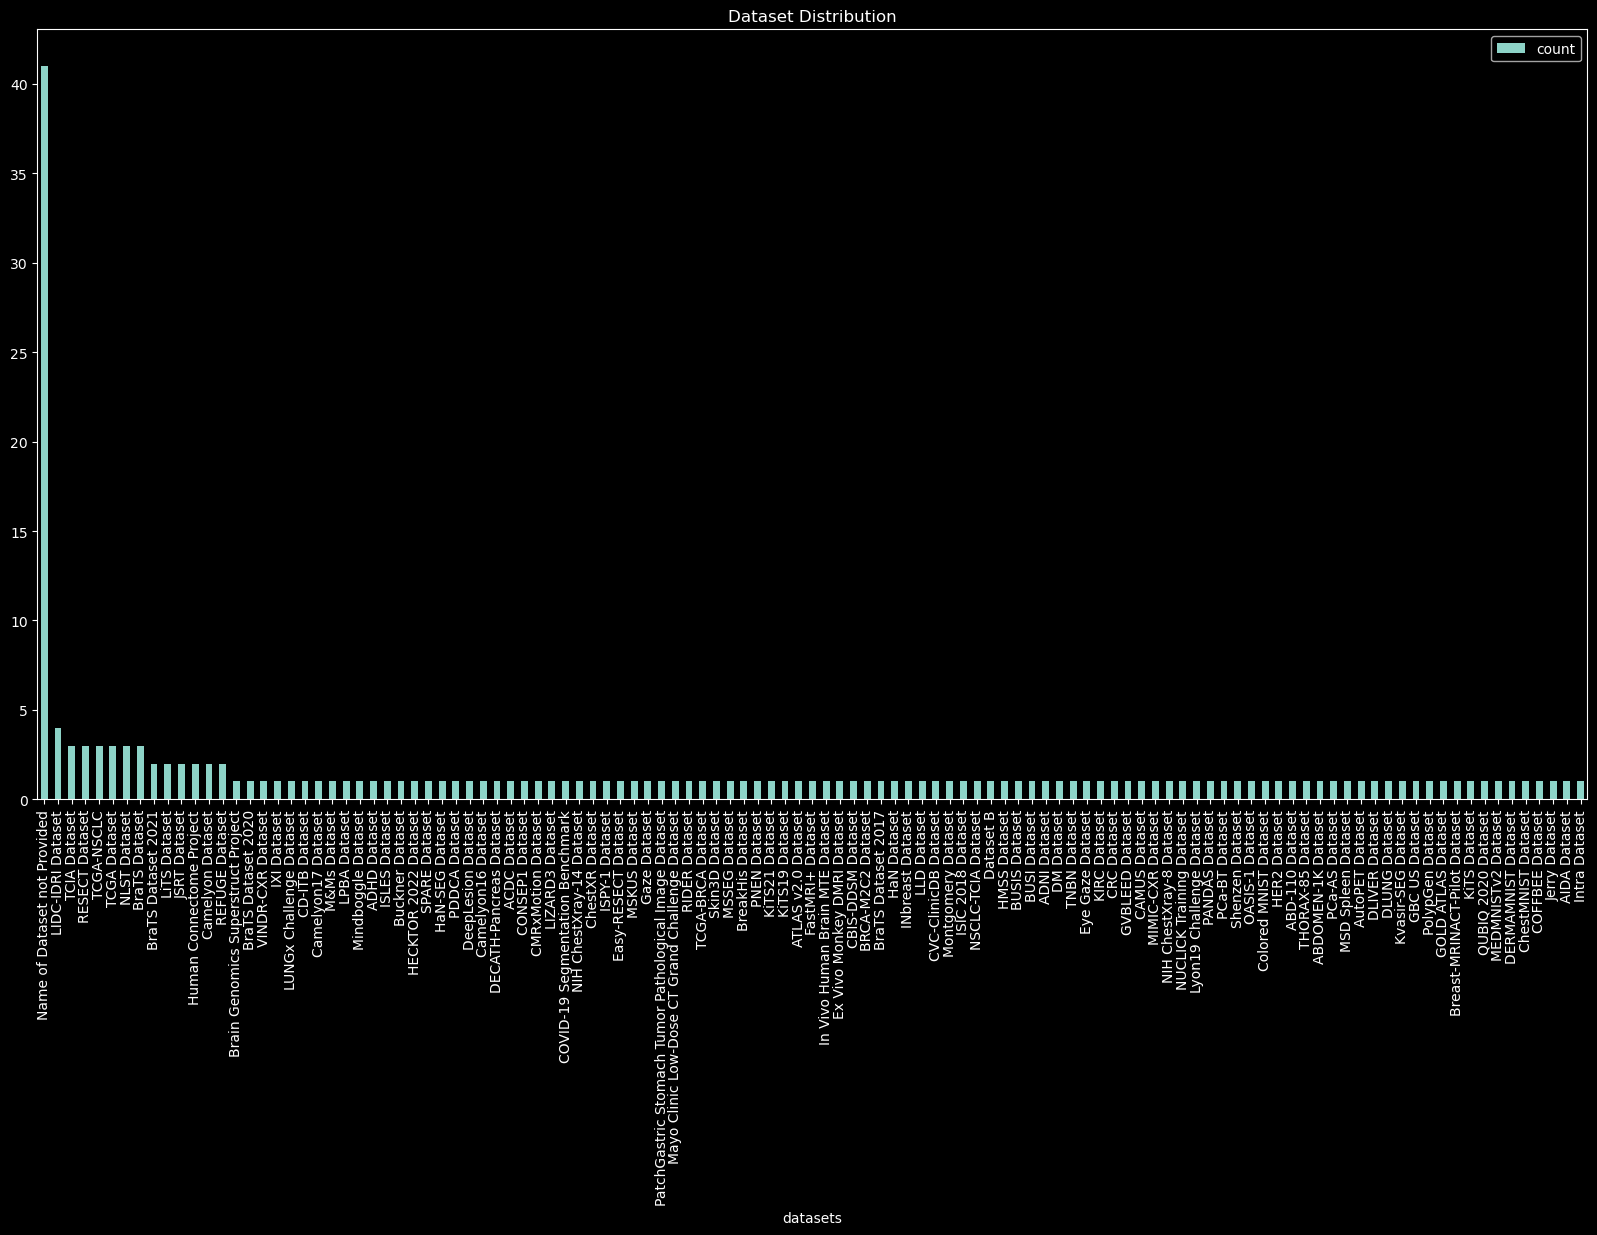

In [85]:
unique_datasets_df.plot(kind='bar', x='datasets', y='count', figsize=(20, 10), title='Dataset Distribution') 

In [89]:
unique_datasets_df.sort_values(by='datasets', ascending=True).to_csv('dataset_counts_sorted.csv', index=False)


In [90]:
len(unique_datasets_df)

113